Constraint check (should be 1.0): Mean = 6.509154, Std = 5.009718


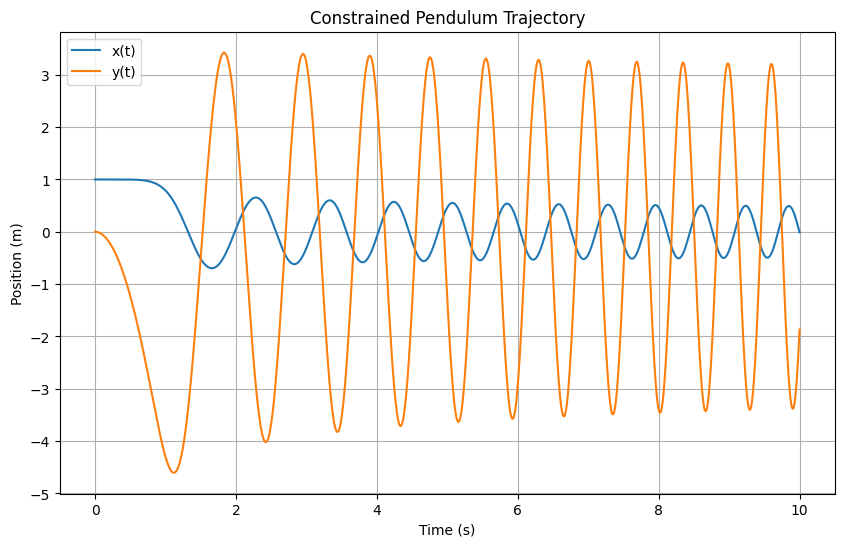

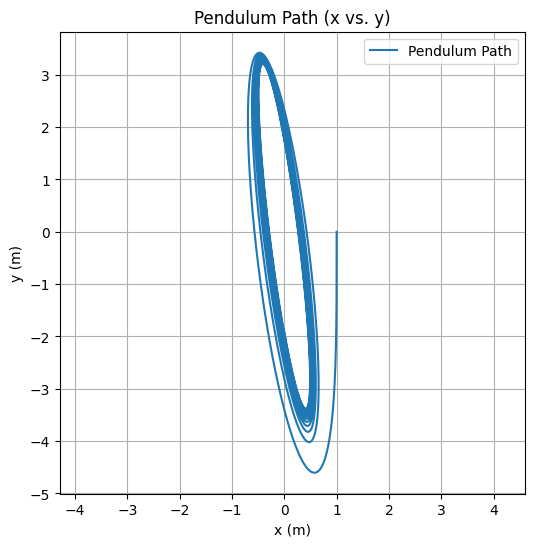

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define constants
g = 9.81  # Gravity (m/s^2)
L = 1.0   # Pendulum length (m)

# DAE function: returns residuals for differential and algebraic equations
def pendulum_dae(t, z):
    x, y, vx, vy, lam = z  # State variables: position (x, y), velocity (vx, vy), Lagrange multiplier (lam)
    return [
        vx,  # dx/dt = vx
        vy,  # dy/dt = vy
        -2 * lam * x,  # d(vx)/dt = -2 * lambda * x (force from constraint)
        -2 * lam * y - g,  # d(vy)/dt = -2 * lambda * y - g (constraint + gravity)
        x**2 + y**2 - L**2  # Algebraic constraint: x^2 + y^2 = L^2
    ]

# Solve the DAE
t_span = (0, 10)  # Time range: 0 to 10 seconds
z0 = [L, 0, 0, 0, 0]  # Initial conditions: x=L, y=0, vx=0, vy=0, lambda=0
t_eval = np.linspace(0, 10, 1000)  # Time points for output
sol = solve_ivp(pendulum_dae, t_span, z0, method='Radau', t_eval=t_eval)

# Verify constraint
constraint = sol.y[0]**2 + sol.y[1]**2  # Should be close to L^2
print(f"Constraint check (should be {L**2}): Mean = {np.mean(constraint):.6f}, Std = {np.std(constraint):.6f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='x(t)')
plt.plot(sol.t, sol.y[1], label='y(t)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Constrained Pendulum Trajectory')
plt.legend()
plt.grid(True)
plt.savefig('pendulum_trajectory.png')
plt.show()

# Optional: Plot pendulum path in 2D
plt.figure(figsize=(6, 6))
plt.plot(sol.y[0], sol.y[1], label='Pendulum Path')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Pendulum Path (x vs. y)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.savefig('pendulum_path.png')
plt.show()